In [21]:
import ipynb.fs.full.helper as hp
import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy import signal
import scipy.interpolate
import h5py
from IPython.display import HTML

### Tracker Camera

In [22]:
camera_df = pandas.read_csv("~/data/Test_6_Bag/camera.csv")
camera_df.rename(columns={'Unnamed: 0':'time'}, inplace=True)
camera_df.columns.get_loc("/camera/odom/sample/pose/pose/orientation/w")
new_df = camera_df.iloc[:, np.r_[0, 102:109, 145:150]]

/home/flybot/anaconda3/envs/FlyDataAnalysis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
new_df=new_df.interpolate()
#camera_df
new_df.columns=new_df.columns.str.replace(r"/","_")
new_df

,time,_camera_odom_sample_pose_pose_orientation_w,_camera_odom_sample_pose_pose_orientation_x,_camera_odom_sample_pose_pose_orientation_y,_camera_odom_sample_pose_pose_orientation_z,_camera_odom_sample_pose_pose_position_x,_camera_odom_sample_pose_pose_position_y,_camera_odom_sample_pose_pose_position_z,_camera_odom_sample_twist_twist_angular_x,_camera_odom_sample_twist_twist_angular_y,_camera_odom_sample_twist_twist_angular_z,_camera_odom_sample_twist_twist_linear_x,_camera_odom_sample_twist_twist_linear_y
0,1.595958e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.595958e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.595958e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.595958e+09,0.573671,-0.029521,-0.028755,-0.818049,-0.076626,0.112978,0.004285,0.004059,0.000987,-0.001743,-0.016901,0.010181
4,1.595958e+09,0.573692,-0.029512,-0.028749,-0.818034,-0.076969,0.112727,0.004380,0.005182,0.002013,0.001496,-0.011201,0.006384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320129,1.595959e+09,0.879717,0.025146,-0.082470,-0.467616,-3.613695,1.727810,-1.000961,-0.000755,-0.002251,-0.006263,0.006281,-0.003096
320130,1.595959e+09,0.879717,0.025146,-0.082470,-0.467616,-3.613695,1.727810,-1.000961,-0.000755,-0.002251,-0.006263,0.006281,-0.003096
320131,1.595959e+09,0.879717,0.025146,-0.082470,-0.467616,-3.613695,1.727810,-1.000961,-0.000755,-0.002251,-0.006263,0.006281,-0.003096
320132,1.595959e+09,0.879717,0.025146,-0.082470,-0.467616,-3.613695,1.727810,-1.000961,-0.000755,-0.002251,-0.006263,0.006281,-0.003096


Text(0.5, 0, 'Time, sec')

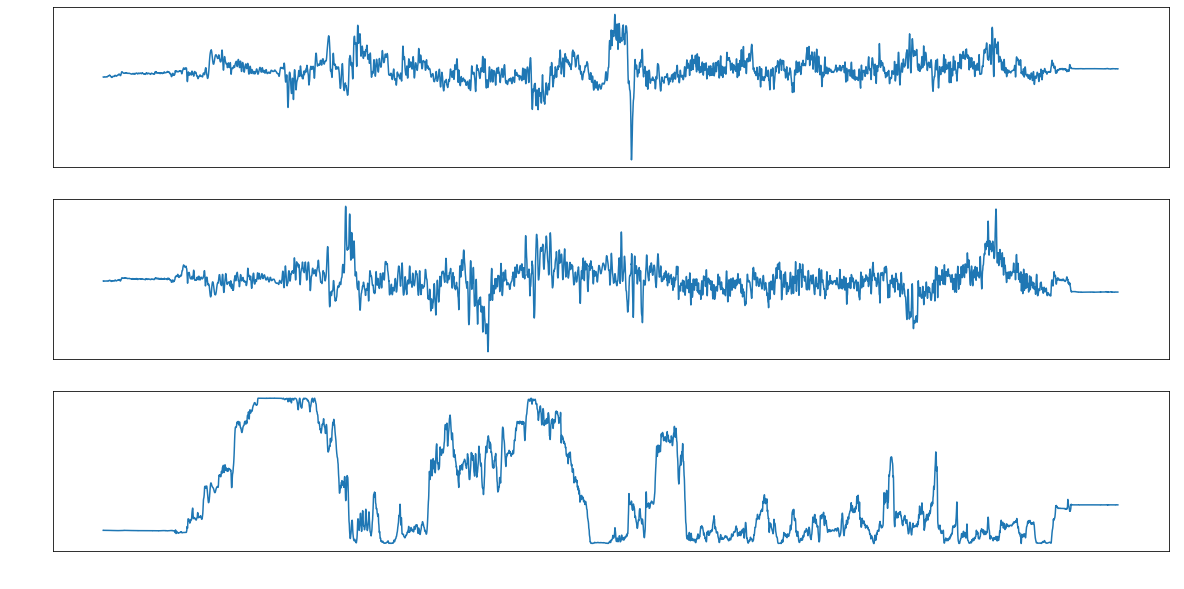

In [24]:
##plot pose
fig_imu = plt.figure(figsize=(20,10))

ax1 = fig_imu.add_subplot(311)
ax1.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_x)
ax1.set_ylabel('pose orientation x')
hp.plot_color(ax1)

ax2 = fig_imu.add_subplot(312)
ax2.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_y)
ax2.set_ylabel('pose orientation y')
hp.plot_color(ax2)

ax3 = fig_imu.add_subplot(313)
ax3.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_z)
ax3.set_ylabel('pose orientation y')
hp.plot_color(ax3)

ax3.set_xlabel('Time, sec')

### Orientation from Tracker

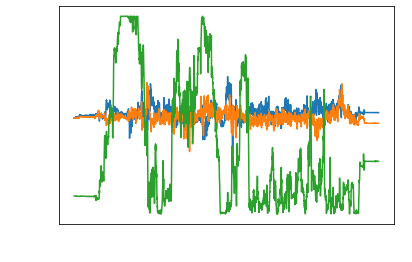

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_x)
ax.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_y)
ax.plot(new_df.time, new_df._camera_odom_sample_pose_pose_orientation_z)
ax.set_ylabel('Pose Orientation (x,y,z)')
ax.set_xlabel('Time, sec')
hp.plot_color(ax)

### Pose from Tracker

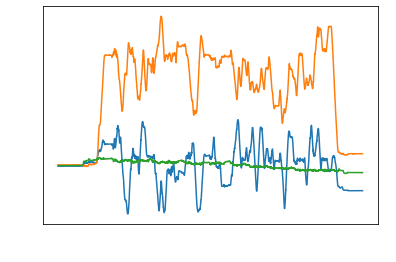

In [26]:
fig_pose = plt.figure()
ax_pose = fig_pose.add_subplot(111)
ax_pose.plot(new_df.time, new_df._camera_odom_sample_pose_pose_position_x)
ax_pose.plot(new_df.time, new_df._camera_odom_sample_pose_pose_position_y)
ax_pose.plot(new_df.time, new_df._camera_odom_sample_pose_pose_position_z)
ax_pose.set_ylabel('Position (x,y,z)')
ax_pose.set_xlabel('Time, sec')
hp.plot_color(ax_pose)
